In [76]:
import math

import numpy as np
import sys
import os
import matplotlib.pyplot as plt

def get(path):
    X = []
    for data_file in os.listdir(path):
        filepath = path + data_file 
        X.append(np.loadtxt(filepath)[:,:1227])
    return np.array(X)
#path = 'log/gaussian/gamma90/'



In [77]:
Xv1 = get('./cacla/log/gaussian/32_novar_normobs_gamma90_std0.3/')
Xv2 = get('./cacla/log/gaussian/32_var_normobs_gamma90_std0.3/')

ygavg = np.loadtxt("./ddpg_gav/resultats/gavgaussian_95_2024-01-15_14:19:08.txt")
ygavg1 = ygavg.mean(0)
xgav = np.arange(0,11)
xgav = 100*2**xgav
xgav = np.hstack((0,xgav))

Xv11 = get('./cacla/log/epsilon/32_novar_normobs_gamma95_std0.3/')
Xv21 = get('./cacla/log/epsilon/32_var_normobs_gamma90_std0.3/')

ygavepsr = np.loadtxt("./ddpg_gav/resultats/gavegreedy_95_2024-01-17_15:59:07.txt")
ygaveps = ygavepsr.mean(0)

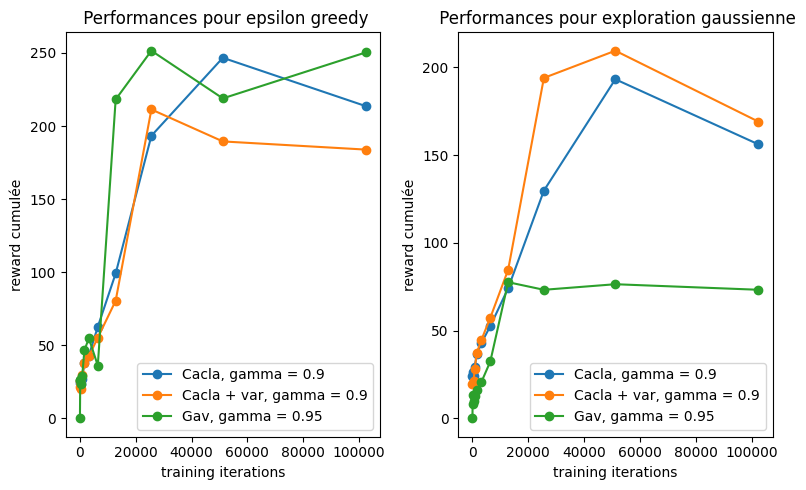

In [78]:
x = Xv1.mean(0)
x2 = Xv2.mean(0)

fig = plt.figure(figsize=(8,5))

# epsilon
plt.subplot(1,2,1)
x1 = Xv11.mean(0)
x21 = Xv21.mean(0)
plt.plot(x1[:,0], x1[:,1],"o-",label="Cacla, gamma = 0.9")
plt.plot(x21[:,0], x21[:,1],"o-",label="Cacla + var, gamma = 0.9")
plt.plot(xgav, ygaveps,"o-", label="Gav, gamma = 0.95")
plt.title(f' Performances pour epsilon greedy')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.legend()


#gaussian
plt.subplot(1,2,2)
plt.plot(x[:,0], x[:,1],"o-",label="Cacla, gamma = 0.9")
plt.plot(x2[:,0], x2[:,1],"o-",label="Cacla + var, gamma = 0.9")
plt.plot(xgav, ygavg1,"o-", label="Gav, gamma = 0.95")
plt.title(f' Performances pour exploration gaussienne')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.legend()
plt.tight_layout()

In [79]:
varx1 = Xv11.std(0)[:,1]
varx2 = Xv21.std(0)[:,1]
varx3 = ygaveps.std(0)

varxg1 = Xv1.std(0)[:,1]
varxg2 = Xv2.std(0)[:,1]
varxg3 = ygavg.std(0)

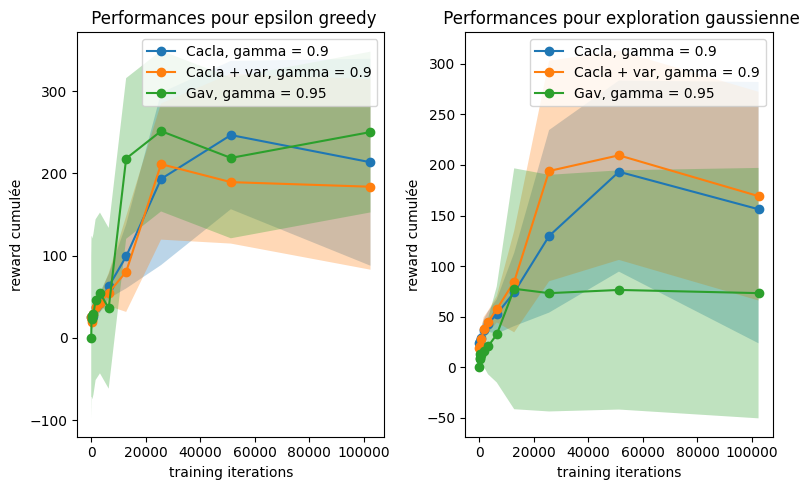

In [82]:

fig = plt.figure(figsize=(8,5))


plt.subplot(1,2,1)


plt.plot(x1[:,0], x1[:,1],"o-",label="Cacla, gamma = 0.9")
plt.fill_between(x1[:,0],x1[:,1]-varx1,x1[:,1]+varx1, alpha = 0.3)
plt.plot(x21[:,0], x21[:,1],"o-",label="Cacla + var, gamma = 0.9")
plt.fill_between(x21[:,0],x21[:,1]-varx2,x1[:,1]+varx2, alpha = 0.3)
plt.plot(xgav, ygaveps,"o-", label="Gav, gamma = 0.95")
plt.fill_between(xgav,ygaveps-varx3,ygaveps+varx3, alpha = 0.3)
plt.title(f' Performances pour epsilon greedy')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.legend()


plt.subplot(1,2,2)

plt.plot(x[:,0], x[:,1],"o-",label="Cacla, gamma = 0.9")
plt.fill_between(x[:,0],x[:,1]-varxg1,x[:,1]+varx1, alpha = 0.3)
plt.plot(x2[:,0], x2[:,1],"o-",label="Cacla + var, gamma = 0.9")
plt.fill_between(x2[:,0],x2[:,1]-varxg2,x2[:,1]+varxg2, alpha = 0.3)
plt.plot(xgav, ygavg1,"o-", label="Gav, gamma = 0.95")
plt.fill_between(xgav,ygavg1-varxg3,ygavg1+varxg3, alpha = 0.3)
plt.title(f' Performances pour exploration gaussienne')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.legend()
plt.tight_layout()

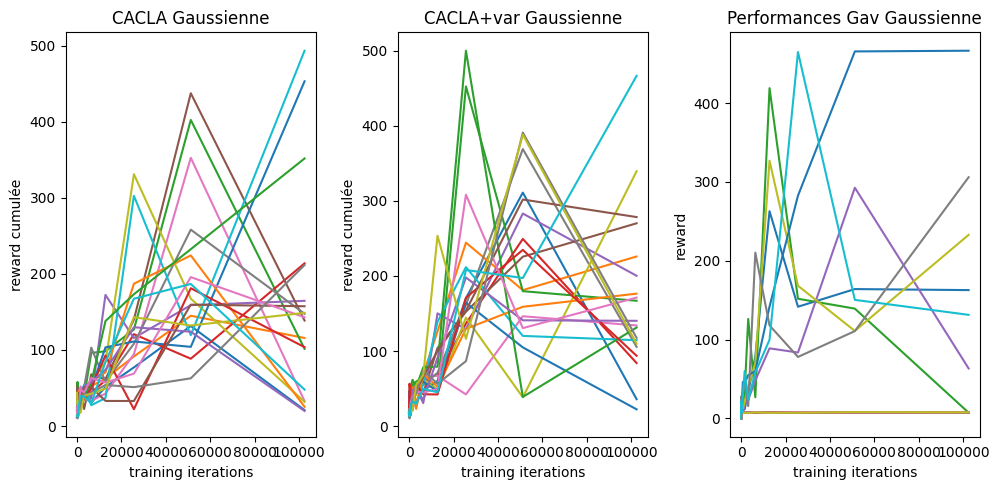

<Figure size 640x480 with 0 Axes>

In [83]:
fig = plt.figure(figsize=(10,5))


plt.subplot(1,3,1)
for x in Xv1:
    plt.plot(x[:,0], x[:,1], alpha=1)
    #break
plt.title(f'CACLA Gaussienne')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')


plt.subplot(1,3,2)
for x in Xv2:
    plt.plot(x[:,0], x[:,1], alpha=1)
    #break
plt.title(f'CACLA+var Gaussienne')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.tight_layout()

plt.subplot(1,3,3)
for y in ygavg[:]:
    plt.plot(xgav,y)
    
plt.xlabel("training iterations")
plt.ylabel("reward")
plt.title("Performances Gav Gaussienne")
plt.show()
plt.tight_layout()




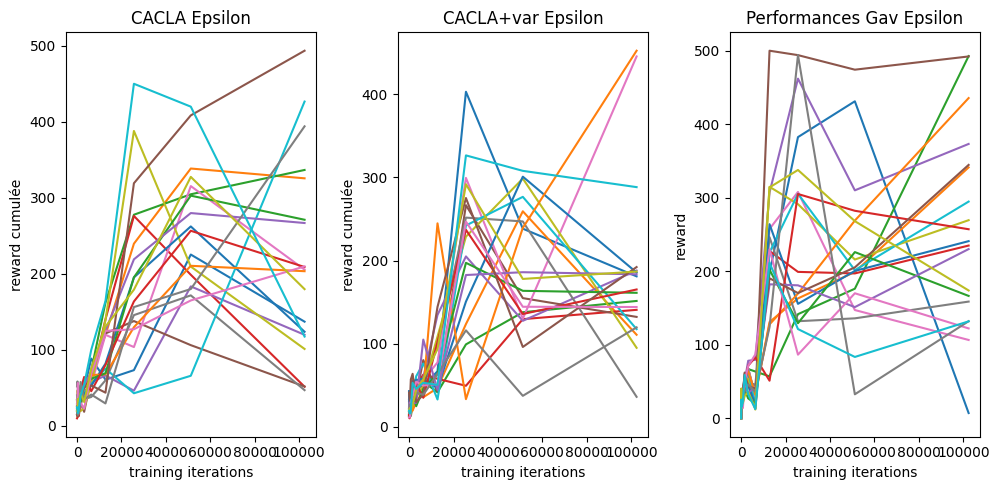

<Figure size 640x480 with 0 Axes>

In [84]:
fig = plt.figure(figsize=(10,5))


plt.subplot(1,3,1)
for x in Xv11:
    plt.plot(x[:,0], x[:,1], alpha=1)
    #break
plt.title(f'CACLA Epsilon')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')


plt.subplot(1,3,2)
for x in Xv21:
    plt.plot(x[:,0], x[:,1], alpha=1)
    #break
plt.title(f'CACLA+var Epsilon')
plt.xlabel('training iterations')
plt.ylabel('reward cumulée')
plt.tight_layout()

plt.subplot(1,3,3)
for y in ygavepsr[:]:
    plt.plot(xgav,y)
    
plt.xlabel("training iterations")
plt.ylabel("reward")
plt.title("Performances Gav Epsilon")
plt.show()
plt.tight_layout()


